ctrl shift c ctrl shift t ctrl shift r

### Common definitions

1. Views - a stored query definition that can be used to simplify writing T-SQL statements or to secure data access, can be thought of as simplified data design to perform queries faster
2. Stored Procedures - stored script that can include queries, DDL to create or modify objects and programming logic. they can return tabular data.
3. User defined functions - similar to stored procedures but can return tabular data as well as single value, cant affect anything outside the function.
4. Indexes - data structure that increases the speed of queries
5. Constraints - rules that govern the behavious and permissible values of the table and the columns
6. Triggers - special type of stored procedures that fires when something happens in the database like when a row is inserted or when an object is created
7. Sequences - User defined object that generates a sequence of numbers 
8. Assemblies - references to database objects created in a .Net language, this functionality is valled common language runtime (CLR) integration

### SQL server files

- a database must have 2 files 

1. data file with .mdf extension
2. log file with .ldf extension

- additional data files if used have the .ndf extension
- data files can be grouped together strategically to backup only portions of the database
- log file stored transactions or changes to the data to ensure consistency
- backups of the log files can be taken for DB restoration

### some notes

- each table in a normalized database should hold information about only one type of entity and a primary key.
- each column has a definition specifying a data type along with rules AKA constraints.
- we can have a computed data type where the value of the column is calculated with a formula 
    - 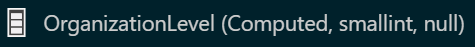
- we can have user defined data types as well
    - like a phone number in the adventure works DB
- we can create custom data types called CLR data types with multiple properties and methods using a .NET language such as C#

### Indexes

- everytime we create a key or a unique column we place an index on the column
- indexes are stored separately from the data but accessed automatically when we run a query
- and are updated everytime a row is added or removed from the table
- index is a data structure to help DB look up information fast, usually a balanced tree on data that can be ordered and searched using the equality operators \<,\>,\<=,\>=,==, and between
- its created automatically but we can create it with create index command
- instead of Btrees there are other generalized types of indexes as well

kinds of indexes

1. clustered
2. stores and organizes the table
3. arrange the data in the table like sort to make look up faster
4. a table can have only one clustered index thats because its just the entire table sorted on the cluster key
5. when we add new rows old rows dont have to move for them to stay in order because the new row will be added into the correct data page which will have some free space
6. a list of pointers is maintained to keep track of the order of the pages, so the rows in the other pages wont have to move
7. usually the primary key is used as the cluster key
8. non-clustered
9. defined on one or more columns of the table, its a separate strcuture that points to the actual table
10. stores the data and records in different tablesso that scanning records is faster to look for the data you want
11. we can have 999 unclustered index per table
12. these may be actually used if working with sparse columns

indexes are optional but greatly improve performance when properly designed and implemented

but they can also take up disk space

If a table has four nonclustered indexes, every write to that table may require four additional writes to keep the indexes up to date

### Example

- phone directory, primary key is the phone number but the cluster key is the first name plus the last name
- if the name starts with d you start looking in the beginning of the directory in your brain you did this calculation
    - mid alphabet is j or k and d\<j or k so it must be in the first half, thats basically a binary search

### schemas

- a collection to organize database objects and tables within the database
- a User has a default schema and when accessing an object in the default schema you dont have to specify the schema name but tis good practice to do so
- if a user has permission to create new objects the objects belong to the user's default schema unless specified other wise

### Select queries

- In a select statement from is the first clause the database engine evaluates
- The word GO doesn’t really do anything except divide the code up into separate distinct code batches.

In [ ]:
USE AdventureWorks2022;
--changing to the example database
GO
SELECT BusinessEntityID, JobTitle
FROM HumanResources.Employee;

- Column and table names need to follow specific naming rules so that SQL Server’s parser can recognize them. When a table, column, or database has a name that doesn’t follow those rules, you can still use that name, but you must enclose it within square brackets (\[\]).
- SQL Server allows you to create or rename a column within a query by using what is known as an alias. You use the keyword AS to specify an alias for the column.
- You can specify an alias name immediately following a column name. If an alias contains a space or is a reserved word—basically, keywords used to write T-SQL statements—you can surround the alias with square brackets, single quotes, or double quotes.

In [ ]:
SELECT 'A Literal Value' AS "Literal Value",
BusinessEntityID AS EmployeeID,
LoginID,
JobTitle
FROM HumanResources.Employee;

In [ ]:
SELECT EMP.JobTitle
FROM HumanResources.Employee AS EMP;

There is a property called collation that determines whether or not case matters. If the database is set to use a case-sensitive collation, then the names of the tables and columns must match exactly.  
  

single quotes are used for literal values

double quotes for column names, aliases and table names and aliases. double quotes or square brackets are necessary when name contains a space or is a keyword

1. <span style="color: var(--vscode-foreground);">Switch to the AdventureWorks database&nbsp;</span> <span style="color: var(--vscode-foreground);">Write a SELECT statement that lists the customers. Include the CustomerID, StoreID, and AccountNumber columns from the Sales.Customer table.</span>

In [ ]:
SELECT cus.CustomerID, cus.StoreID, cus.AccountNumber
FROM Sales.Customer AS cus;

2\. Write a SELECT statement that lists the name, product number, and color of each product from the Production.Product table.

In [ ]:
SELECT prod.Name, prod.Color
FROM Production.Product as prod;

3\. Write a SELECT statement that lists the customer ID numbers and sales order ID numbers from the Sales.SalesOrderHeader table.

In [ ]:
SELECT sales.CustomerID,sales.SalesOrderID
FROM Sales.SalesOrderHeader AS sales;

4\. Switch to the WideWorldImporters database for the remaining questions in this exercise. Write a SELECT statement that lists only the StateProvinceCode and the StateProvinceName from the Application.StateProvinces table. Include a literal value as the first column in the SELECT list: 'State Abbr/Name:'.

In [ ]:
SELECT 'omaewa mo shindeiru' AS "nani", StateProvinceCode, StateProvinceName
from Application.StateProvinces;